In [3]:
import requests
import os

API_KEY = os.getenv("OPENAI_API_KEY")
headers = {"Authorization": f"Bearer {API_KEY}"}
params = {"start_date": "2025-06-16", "end_date": "2025-06-17"}

response = requests.get("https://api.openai.com/v1/dashboard/usage", headers=headers, params=params)

print(response)


<Response [404]>


In [30]:
import json
fp = "/home/gathomp3/deep_learning/EIG_elicitation/generative-elicitation/gpt-4-cache-seed-0.jsonl"

json_data = []
with open(fp, 'r') as f:
    for line in f:
        data = json.loads(line)
        # Process each JSON object (dictionary)
        # print(data)
        json_data.append(data)

In [48]:
list(data.values())[0]

{'id': 'chatcmpl-BjTJdijdpe12N50Nf9KTRalbAFrp6',
 'object': 'chat.completion',
 'created': 1750177149,
 'model': 'gpt-4-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': '1',
    'refusal': None,
    'annotations': []},
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 190,
  'completion_tokens': 1,
  'total_tokens': 191,
  'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
  'completion_tokens_details': {'reasoning_tokens': 0,
   'audio_tokens': 0,
   'accepted_prediction_tokens': 0,
   'rejected_prediction_tokens': 0}},
 'service_tier': 'default',
 'system_fingerprint': None}

In [75]:
list(data.keys())[0]

'[{"role": "user", "content": "A user has a particular format of emails that they believe to be valid. The following answer(s) represent this user\'s preferences of whether these emails adhere to their desired format.\\n- Can you describe what kind of special characters, if any, you believe should be allowed in an email address, and where in the address they should be permitted? -> Special characters are allowed before and after the \'@\' symbol and after the \'.\' in the domain. However, the \'@\' and \'.\' themselves cannot be preceded or followed by another \'@\' or \'.\'.\\n\\nBased on the user\'s preferences, does the following email adhere to the user\'s desired format? Answer with a probability between 0 and 1, where 0 means \\"definitely not\\" and 1 means \\"definitely yes\\". Only output the probability and nothing else. If uncertain, make your best guess.\\n+u%ser+tag+@example.net\\n"}]'

In [66]:
list(data.values())[0]

{'id': 'chatcmpl-BjTJdijdpe12N50Nf9KTRalbAFrp6',
 'object': 'chat.completion',
 'created': 1750177149,
 'model': 'gpt-4-0613',
 'choices': [{'index': 0,
   'message': {'role': 'assistant',
    'content': '1',
    'refusal': None,
    'annotations': []},
   'logprobs': None,
   'finish_reason': 'stop'}],
 'usage': {'prompt_tokens': 190,
  'completion_tokens': 1,
  'total_tokens': 191,
  'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0},
  'completion_tokens_details': {'reasoning_tokens': 0,
   'audio_tokens': 0,
   'accepted_prediction_tokens': 0,
   'rejected_prediction_tokens': 0}},
 'service_tier': 'default',
 'system_fingerprint': None}

In [69]:
from utils import load_openai_cache
cache = load_openai_cache("gpt-4-cache-seed-0.jsonl")
print(len(cache))       # number of cached interactions
first_key = next(iter(cache))
print(json.loads(first_key))        # the message history
print(cache[first_key]['choices'][0]['message']['content'])  # the response text

189
[{'role': 'user', 'content': 'A user has a particular format of emails that they believe to be valid. The following answer(s) represent this user\'s preferences of whether these emails adhere to their desired format.\n\n\nBased on the user\'s preferences, does the following email adhere to the user\'s desired format? Answer with a probability between 0 and 1, where 0 means "definitely not" and 1 means "definitely yes". Only output the probability and nothing else. If uncertain, make your best guess.\njohn.doe@example.com\n'}]
1


In [82]:
import json

prompts = []
outputs = []

with open(fp) as f:
    for line in f:
        d = json.loads(line)
        for key, response in d.items():
            # Convert the key from string to actual JSON list
            prompt = json.loads(key)
            model_reply = response['choices'][0]['message']['content']
            prompts.append(prompt[0]["content"])
            outputs.append(model_reply)
            print("Prompt:", prompt[0]["content"])
            print("Model output:", model_reply)

Prompt: A user has a particular format of emails that they believe to be valid. The following answer(s) represent this user's preferences of whether these emails adhere to their desired format.


Based on the user's preferences, does the following email adhere to the user's desired format? Answer with a probability between 0 and 1, where 0 means "definitely not" and 1 means "definitely yes". Only output the probability and nothing else. If uncertain, make your best guess.
john.doe@example.com

Model output: 1
Prompt: A user has a particular format of emails that they believe to be valid. The following answer(s) represent this user's preferences of whether these emails adhere to their desired format.


Based on the user's preferences, does the following email adhere to the user's desired format? Answer with a probability between 0 and 1, where 0 means "definitely not" and 1 means "definitely yes". Only output the probability and nothing else. If uncertain, make your best guess.
john_123

In [152]:
from pprint import pprint
pprint(prompts[0])

('A user has a particular format of emails that they believe to be valid. The '
 "following answer(s) represent this user's preferences of whether these "
 'emails adhere to their desired format.\n'
 '\n'
 '\n'
 "Based on the user's preferences, does the following email adhere to the "
 "user's desired format? Answer with a probability between 0 and 1, where 0 "
 'means "definitely not" and 1 means "definitely yes". Only output the '
 'probability and nothing else. If uncertain, make your best guess.\n'
 'john.doe@example.com\n')


In [150]:
pprint(outputs[0])

'1'


In [137]:
outputs.map(int)

AttributeError: 'list' object has no attribute 'map'

In [145]:
filtered_outputs = []
for element in outputs: 
    try:
        filtered_outputs.append(float(element))
    except ValueError:
        continue


(array([28.,  8.,  0.,  0.,  0., 67.,  0.,  0.,  0., 71.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

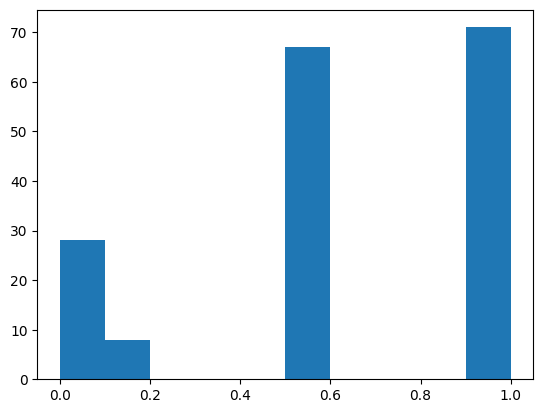

In [147]:
import matplotlib.pyplot as plt

plt.hist(filtered_outputs )